In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


from numpy import genfromtxt

C:\Users\Marakhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
im=cv2.imread('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\21\\label.PNG')

In [27]:
edges = cv2.Canny(im,0,100)
edges[:20,:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,  

TypeError: Image data cannot be converted to float

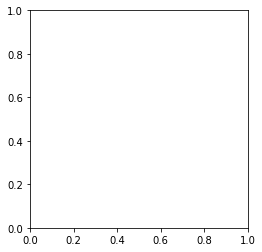

In [18]:
plt.imshow(im)

In [40]:
y_train = np.zeros(186*2)
y_train = np.concatenate((y_train, np.ones(192*2)), axis=None)
y_train.astype(np.uint8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(220, 1225)
(220, 35, 35, 3)


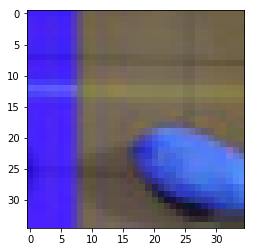

In [28]:
k = 0
for i in range(0,220,1):
    file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\label.PNG'
    file_name1 = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\img.PNG'
    im = cv2.imread(file_name)
    im = im[:,:,2].ravel()
    im1 = cv2.imread(file_name1)
    #print(file_name)
    #plt.imshow(im)
    imshow(im1)
    if k==0:
        y_train=np.expand_dims(im, axis=0)
        x_train=np.expand_dims(im1, axis=0)
        k = k+1
    else:
        y_train = np.concatenate((y_train, np.expand_dims(im, axis=0)), axis=0) 
        x_train = np.concatenate((x_train, np.expand_dims(im1, axis=0)), axis=0)
print(y_train.shape)
print(x_train.shape)

In [36]:
#imshow(y_train[219])
y_train1 = (y_train/128).astype(int)
#y_train2 = y_train1[:].ravel()
#print(y_train[][600:1200]/128)
print(y_train1[0][:].reshape(35,35)[5:25,5:25])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [37]:
X_input = Input(x_train.shape[1:])

X = ZeroPadding2D((3, 3))(X_input)

X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
s1 = Activation('relu')(X)

X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(s1)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
s2 = Activation('relu')(X)

X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv3')(s2)
X = BatchNormalization(axis = 3, name = 'bn3')(X)
X = Activation('relu')(X)

X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv4')(X)
X = BatchNormalization(axis = 3, name = 'bn4')(X)
s3 = Activation('relu')(X)

X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv5')(s3)
X = BatchNormalization(axis = 3, name = 'bn5')(X)
X = Activation('relu')(X)

X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv6')(X)
X = BatchNormalization(axis = 3, name = 'bn6')(X)
s4 = Activation('relu')(X)

X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv7')(s4)
X = BatchNormalization(axis = 3, name = 'bn7')(X)
X = Activation('relu')(X)

X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv8')(X)
X = BatchNormalization(axis = 3, name = 'bn8')(X)
s5 = Activation('relu')(X)

X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv9')(s5)
X = BatchNormalization(axis = 3, name = 'bn9')(X)
X = Activation('relu')(X)

X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv10')(X)
X = BatchNormalization(axis = 3, name = 'bn10')(X)
s6 = Activation('relu')(X)

X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv11')(s6)
X = BatchNormalization(axis = 3, name = 'bn11')(X)
X = Activation('relu')(X)

X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv12')(X)
X = BatchNormalization(axis = 3, name = 'bn12')(X)
s7 = Activation('relu')(X)

X = Conv2DTranspose(64, (3, 3), strides = (1, 1), name = 'deconv_1')(s2)
X = BatchNormalization(axis = 3, name = 'bn13')(X)
m1 = Activation('relu')(X)

X = Conv2DTranspose(64, (9, 9), strides = (1, 1), name = 'deconv_2')(s3)
X = BatchNormalization(axis = 3, name = 'bn14')(X)
m2 = Activation('relu')(X)

X = Conv2DTranspose(64, (15, 15), strides = (1, 1), name = 'deconv_3')(s4)
X = BatchNormalization(axis = 3, name = 'bn15')(X)
m3 = Activation('relu')(X)

X = Conv2DTranspose(64, (21, 21), strides = (1, 1), name = 'deconv_4')(s5)
X = BatchNormalization(axis = 3, name = 'bn16')(X)
m4 = Activation('relu')(X)

X = Conv2DTranspose(64, (27, 27), strides = (1, 1), name = 'deconv_5')(s6)
X = BatchNormalization(axis = 3, name = 'bn17')(X)
m5 = Activation('relu')(X)

X = Conv2DTranspose(64, (35, 35), strides = (1, 1), name = 'deconv_6')(s7)
X = BatchNormalization(axis = 3, name = 'bn18')(X)
m6 = Activation('relu')(X)

m = concatenate([m1, m2, m3, m4, m5, m6])

final1 = Conv2D(1, (1, 1), strides = (1, 1), name = 'final')(m)
final = Activation('sigmoid')(final1)

Y = Flatten()(final)
# Y = Dense(1225, activation='sigmoid', name='fc')(Y)

model = Model(inputs = X_input, outputs = Y, name='HappyModel')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 35, 35, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 41, 41, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 39, 39, 32)   896         zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn0 (BatchNormalization)        (None, 39, 39, 32)   128         conv0[0][0]                      
__________________________________________________________________________________________________
activation

In [38]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train[0:210], y_train1[0:210], epochs=10, batch_size=32)

Epoch 1/10
210/210 [==============================] - 113s 540ms/step - loss: 0.7681 - acc: 0.7648
Epoch 2/10
210/210 [==============================] - 97s 460ms/step - loss: 0.2863 - acc: 0.9402
Epoch 3/10
210/210 [==============================] - 99s 469ms/step - loss: 0.1778 - acc: 0.9556
Epoch 4/10
210/210 [==============================] - 96s 458ms/step - loss: 0.1375 - acc: 0.9598
Epoch 5/10
210/210 [==============================] - 96s 459ms/step - loss: 0.1166 - acc: 0.9639
Epoch 6/10
210/210 [==============================] - 96s 455ms/step - loss: 0.0958 - acc: 0.9681
Epoch 7/10
210/210 [==============================] - 96s 456ms/step - loss: 0.0826 - acc: 0.9716
Epoch 8/10
210/210 [==============================] - 96s 457ms/step - loss: 0.0699 - acc: 0.9750
Epoch 9/10
210/210 [==============================] - 99s 474ms/step - loss: 0.0660 - acc: 0.9758
Epoch 10/10
210/210 [==============================] - 96s 456ms/step - loss: 0.0638 - acc: 0.9776


In [46]:
x = image.img_to_array(x_train[217])
x = np.expand_dims(x, axis=0)
mark_y=model.predict(x)
# print(np.array(mark_y).reshape(35,35)[20:,:20])
#print(y_train[0][20:,:20])
A = np.array(mark_y)
A[A > 0.5] = 1
A[A <= 0.5] = 0
print(A.astype(int).reshape(35,35)[0:20,20:])
#print(np.array(mark_y)[0,600:1200])
print(y_train1[217].reshape(35,35)[0:20,20:])


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1